In [73]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients


In [74]:
xSerie = np.array([1.0, 2.0])
ySerie = np.array([300.0, 500.0])

In [75]:
#calcular o cost
def calculaCost(x, y, w, b):
    m = x.shape[0]
    custo = np.sum(np.square(np.dot(w, x)+ b - y))
    totalCusto = 1 / (2 * m) * custo

    return totalCusto

Gradient descent
repeat until convergence:
w = w - alpha * dj/dw
b = b - alpha * dj/db

In [76]:
def calculaGradient(x, y, w, b):
    #calcula a derivada
    m = xSerie.shape[0]
    djdw = 1 / m * np.sum((np.dot(w, x) + b - y)*x)
    djdb = 1 / m * np.sum(np.dot(w, x)+ b - y)
    return djdw, djdb


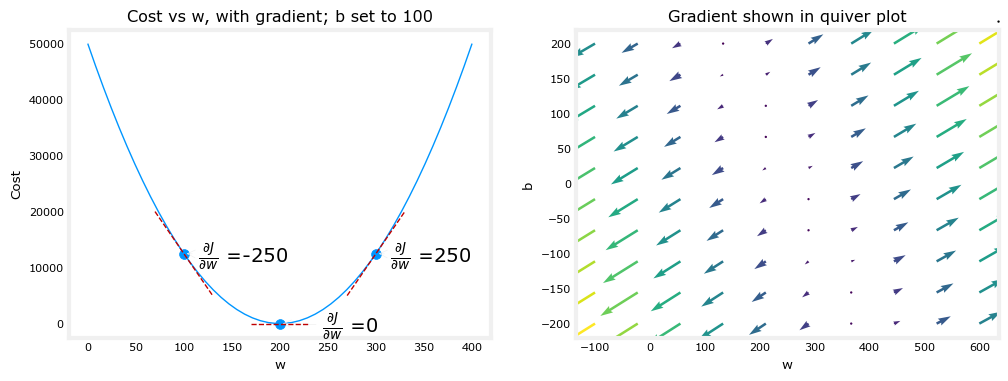

In [77]:
plt_gradients(xSerie, ySerie, calculaCost, calculaGradient)
plt.show()

In [80]:
def gradientDescent(x, y, wIn, bIn, alpha, nItens, calculaCost, calculaGradient):
    jTemp = []
    pTemp = []
    b = bIn
    w = wIn

    for i in range(nItens):
        djdw, djdb = calculaGradient(x, y, w, b)
        b = b - alpha * djdb
        w = w - alpha * djdw

        if i < 100000:
            jTemp.append(calculaCost(x, y, w,b))
            pTemp.append([w, b])

            if i% math.ceil(nItens/10) == 0:
                print(f"Iteração {i:4}: Custo {jTemp[-1]:0.2e}",
                      f"djdw: {djdw: 0.3e}, djdb: {djdb: 0.3e}",
                      f"w: {w : 0.3e}, b: {b : 0.3e}")
        
    return w, b, jTemp, pTemp

Variáveis Internas
jTemp: Lista que armazena o histórico de custos (para visualização).

pTemp: Lista que armazena o histórico dos parâmetros [w, b] (para visualização).

Passo a Passo do Algoritmo
Inicialização:

python
b = bIn
w = wIn
Começa com os valores iniciais de w e b.

Loop de Iterações:

python
for i in range(nItens):
Executa o ajuste dos parâmetros por nItens iterações.

Cálculo dos Gradientes:

python
djdw, djdb = calculaGradient(x, y, w, b)
Calcula quanto w e b contribuem para o erro (derivadas parciais).

Atualização dos Parâmetros:

python
b = b - alpha * djdb
w = w - alpha * djdw
Ajusta w e b na direção que minimiza o custo (gradiente negativo).

alpha controla o tamanho do passo (evita overshooting).

Armazenamento de Histórico:

python
if i < 10e5:
    jTemp.append(calculaCost(x, y, w, b))
    pTemp.append([w, b])
Guarda o custo e os parâmetros a cada iteração (para plots ou análise).

Log de Progresso:

python
if i % math.ceil(nItens/10) == 0:
    print(f"Iteração {i:4}: Custo {jTemp[-1]:0.2e}...")
Exibe o custo e os parâmetros a cada 10% das iterações.

Retorno dos Resultados:

python
return w, b, jTemp, pTemp
w, b: Parâmetros otimizados.

jTemp, pTemp: Histórico para visualização.

Exemplo Numérico
Suponha:

wIn = 0, bIn = 0, alpha = 0.01, nItens = 1000.

Dados: x = [1, 2], y = [3, 5].

Em cada iteração:

Calcula gradientes:

Ex: djdw = -2.5, djdb = -4.0 (depende da função calculaGradient).

Atualiza w e b:

w = 0 - 0.01 * (-2.5) = 0.025

b = 0 - 0.01 * (-4.0) = 0.04

Repete até convergir (custo mínimo).

In [81]:
wIn = 0
bIn = 0
iterations = 10000
alphaTemp = 1.0e-2

wFim, bFim, jHis, pHis = gradientDescent(xSerie, ySerie, wIn, bIn, alphaTemp, iterations, calculaCost, calculaGradient)
print(f"(w,b) encontrado por gradient descent: ({wFim: 8.4f}, {bFim:8.4f})")

Iteração    0: Custo 7.93e+04 djdw: -6.500e+02, djdb: -4.000e+02 w:  6.500e+00, b:  4.000e+00
Iteração 1000: Custo 3.41e+00 djdw: -3.712e-01, djdb:  6.007e-01 w:  1.949e+02, b:  1.082e+02
Iteração 2000: Custo 7.93e-01 djdw: -1.789e-01, djdb:  2.895e-01 w:  1.975e+02, b:  1.040e+02
Iteração 3000: Custo 1.84e-01 djdw: -8.625e-02, djdb:  1.396e-01 w:  1.988e+02, b:  1.019e+02
Iteração 4000: Custo 4.28e-02 djdw: -4.158e-02, djdb:  6.727e-02 w:  1.994e+02, b:  1.009e+02
Iteração 5000: Custo 9.95e-03 djdw: -2.004e-02, djdb:  3.243e-02 w:  1.997e+02, b:  1.004e+02
Iteração 6000: Custo 2.31e-03 djdw: -9.660e-03, djdb:  1.563e-02 w:  1.999e+02, b:  1.002e+02
Iteração 7000: Custo 5.37e-04 djdw: -4.657e-03, djdb:  7.535e-03 w:  1.999e+02, b:  1.001e+02
Iteração 8000: Custo 1.25e-04 djdw: -2.245e-03, djdb:  3.632e-03 w:  2.000e+02, b:  1.000e+02
Iteração 9000: Custo 2.90e-05 djdw: -1.082e-03, djdb:  1.751e-03 w:  2.000e+02, b:  1.000e+02
(w,b) encontrado por gradient descent: ( 199.9929, 100.0116)

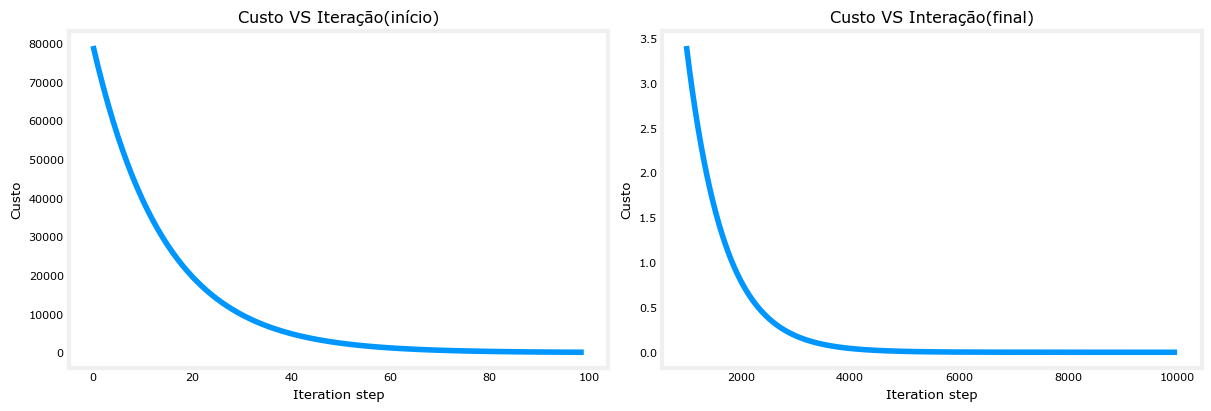

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True, figsize=(12,4))
ax1.plot(jHis[:100])
ax2.plot(1000+np.arange(len(jHis[1000:])), jHis[1000:])
ax1.set_title("Custo VS Iteração(início)"); ax2.set_title("Custo VS Interação(final)")
ax1.set_ylabel('Custo'); ax2.set_ylabel('Custo')
ax1.set_xlabel('Iteration step'); ax2.set_xlabel('Iteration step')
plt.show()

Prediction

In [83]:
print(f"10e3 sqft house prediction {wFim *1.0 + bFim:0.1f} mil de dólares")

10e3 sqft house prediction 300.0 mil de dólares
